/* PART 2: SQLite
/* We now want you to jump over to a local instance of the database on your machine. 

Copy and paste the LocalSQLConnection.py script into an empty Jupyter notebook, and run it. 

Make sure that the SQLFiles folder containing thes files is in your working directory, and
that you haven't changed the name of the .db file from 'sqlite\db\pythonsqlite'.

You should see the output from the initial query 'SELECT * FROM FACILITIES'.

Complete the remaining tasks in the Jupyter interface. If you struggle, feel free to go back
to the PHPMyAdmin interface as and when you need to. 

You'll need to paste your query into value of the 'query1' variable and run the code block again to get an output.
 
QUESTIONS:

/* Q10: Produce a list of facilities with a total revenue less than 1000.
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members! */

/* Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order */


/* Q12: Find the facilities with their usage by member, but not guests */


/* Q13: Find the facilities usage by month, but not guests */


In [12]:
import os
os.getcwd()

'C:\\Users\\moham'

In [15]:
# Changing directory
os.chdir(r"C:\Users\moham\OneDrive\Desktop\Other\Bootcamp\SQL_CaseStudy\SQLFiles Tier 1")

In [18]:
os.getcwd();os.listdir()

['.ipynb_checkpoints',
 'LocalSQLConnection.py',
 'README.md',
 'sqlite_db_pythonsqlite.db',
 'SQLTasks Tier 1.sql']

In [21]:
import sqlite3
from sqlite3 import Error

 
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
 
    return conn

 
def select_all_tasks(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    
    query1 = """
        SELECT *
        FROM FACILITIES
        LIMIT 5
        """
    cur.execute(query1)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


def main():
    database = "sqlite_db_pythonsqlite.db"
 
    # create a database connection
    conn = create_connection(database)
    with conn: 
        print("2. Query all tasks")
        select_all_tasks(conn)
 
 
if __name__ == '__main__':
    main()

2.6.0
2. Query all tasks
(0, 'Tennis Court 1', 5, 25, 10000, 200)
(1, 'Tennis Court 2', 5, 25, 8000, 200)
(2, 'Badminton Court', 0, 15.5, 4000, 50)
(3, 'Table Tennis', 0, 5, 320, 10)
(4, 'Massage Room 1', 9.9, 80, 4000, 3000)


In [23]:
# I have decided to use SQLachemy instead for the rest of the questions.
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

engine = create_engine('sqlite:///sqlite_db_pythonsqlite.db')

table_names = engine.table_names()

print(table_names)

['Bookings', 'Facilities', 'Members']


In [26]:
bookings = pd.read_sql_query("SELECT * FROM Bookings", engine)
facilities = pd.read_sql_query("SELECT * FROM Facilities", engine)
members = pd.read_sql_query("SELECT * FROM Members", engine)

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

bookings.head()
facilities.head()
members.head()

,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2
1,1,4,1,2012-07-03 08:00:00,2
2,2,6,0,2012-07-03 18:00:00,2
3,3,7,1,2012-07-03 19:00:00,2
4,4,8,1,2012-07-03 10:00:00,1


,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,2,Badminton Court,0.0,15.5,4000,50
3,3,Table Tennis,0.0,5.0,320,10
4,4,Massage Room 1,9.9,80.0,4000,3000


,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


Q10: Produce a list of facilities with a total revenue less than 1000.
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members!

In [35]:
query = """

SELECT
    s2.name AS Facility,
    s2.totalrevenue AS Total_Revenue

FROM
    (
    SELECT
        s1.Facility_Name AS name,
        SUM(s1.revenue) AS totalrevenue

FROM
        
(
    SELECT
        b.bookid,
        f.name AS Facility_Name,
            CASE WHEN b.memid = 0 THEN (b.slots * f.guestcost)
            ELSE b.slots*f.membercost END AS Revenue
            
        FROM bookings AS b
        LEFT JOIN members as m
            ON m.memid = b.memid
        LEFT JOIN facilities as f
            ON f.facid = b.facid) AS s1
GROUP BY s1.Facility_Name) AS s2
GROUP by Facility

HAVING Total_Revenue < 1000
ORDER BY Total_Revenue DESC;
"""
total_revenue = pd.read_sql_query(query, engine)
total_revenue


,Facility,Total_Revenue
0,Pool Table,270
1,Snooker Table,240
2,Table Tennis,180


Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order

In [37]:
members.head()

,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


Text(0.5, 1.0, 'List of facilities with a total revenue less than 1000')

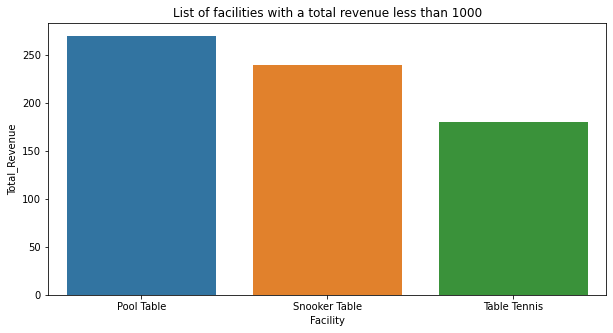

In [38]:
#Visualizing the list of facilities with a total revenue less than 1000

a, b = plt.subplots(figsize = (10, 5))
a = sns.barplot(x=total_revenue['Facility'], y = total_revenue['Total_Revenue'], data=total_revenue)
a.set_title('List of facilities with a total revenue less than 1000')

Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order

In [40]:
bookings.head()
facilities.head()
members.head()

,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2
1,1,4,1,2012-07-03 08:00:00,2
2,2,6,0,2012-07-03 18:00:00,2
3,3,7,1,2012-07-03 19:00:00,2
4,4,8,1,2012-07-03 10:00:00,1


,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,2,Badminton Court,0.0,15.5,4000,50
3,3,Table Tennis,0.0,5.0,320,10
4,4,Massage Room 1,9.9,80.0,4000,3000


,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


In [41]:
query = """

SELECT 
    s2.memberName AS Member, 
    s2.recommender_first || ', ' || s2.recommender_last AS Recommendedby 
FROM 
    (
      SELECT 
          s1.memberName AS memberName, 
          s1.recommenderId AS memberId, 
          m.firstname AS recommender_first, 
          m.surname AS recommender_last 
      FROM 
          (
            SELECT 
                m2.memid AS memberId, 
                m1.firstname || ', ' || m1.surname AS memberName, 
                m2.recommendedby AS recommenderId 
            FROM Members AS m1 
            INNER JOIN Members AS m2 
                ON m1.memid = m2.memid 
            WHERE (
                m2.recommendedby >= 1 
                  ) 
                  AND m1.memid >= 1) AS s1 
      LEFT JOIN Members AS m 
           ON s1.recommenderId = m.memid 
      WHERE m.memid >= 1) AS s2
ORDER BY s2.recommender_last;
"""
pd.read_sql_query(query, engine)

,Member,Recommendedby
0,"Ramnaresh, Sarwin","Florence, Bader"
1,"Joan, Coplin","Timothy, Baker"
2,"Matthew, Genting","Gerald, Butters"
3,"Timothy, Baker","Jemima, Farrell"
4,"David, Pinker","Jemima, Farrell"
5,"Henrietta, Rumney","Matthew, Genting"
6,"Douglas, Jones","David, Jones"
7,"Nancy, Dare","Janice, Joplette"
8,"David, Jones","Janice, Joplette"
9,"John, Hunt","Millicent, Purview"


Q12: Find the facilities with their usage by member, but not guests

In [42]:
bookings.head(1)
facilities.head(1)
members.head(1)

,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2


,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200


,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00


In [55]:
query = """

SELECT  m.surname || ', ' || m.firstname AS Member, 
        f.name AS Facility_Name, 
        slots,
        SUM(slots) AS Usage

FROM facilities AS f
    LEFT JOIN bookings AS b
        USING(facid)
    LEFT JOIN members AS m
        USING(memid)
WHERE Member NOT LIKE "Guest%"
GROUP BY Facility_Name
ORDER BY Usage DESC

"""

usage_by_member = pd.read_sql_query(query, engine)
usage_by_member

,Member,Facility_Name,slots,Usage
0,"Smith, Darren",Badminton Court,3,1086
1,"Smith, Tracy",Tennis Court 1,3,957
2,"Smith, Darren",Massage Room 1,2,884
3,"Smith, Darren",Tennis Court 2,3,882
4,"Smith, Darren",Snooker Table,2,860
5,"Smith, Darren",Pool Table,1,856
6,"Smith, Darren",Table Tennis,2,794
7,"Smith, Darren",Squash Court,2,418
8,"Rownam, Tim",Massage Room 2,2,54


Text(0.5, 1.0, 'List of facilities with their usage by member, but not guests')

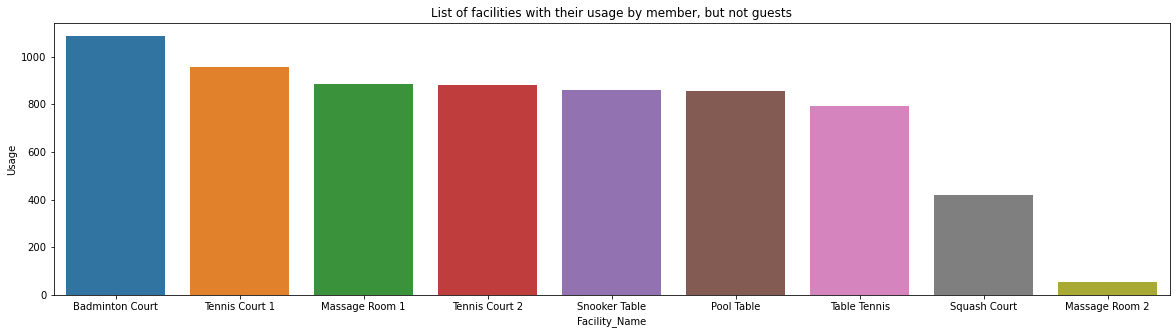

In [57]:
#Visializing the facilities with their usage by member, but not guests

a, b = plt.subplots(figsize = (20, 5))
a = sns.barplot(x=usage_by_member['Facility_Name'], y = usage_by_member['Usage'], data=usage_by_member)
a.set_title('List of facilities with their usage by member, but not guests')

Q13: Find the facilities usage by month, but not guests

In [62]:
query = """
SELECT 
    s1.MONTH AS Month, 
    s1.facilityname AS Facility_Name, 
    SUM(s1.slotNumber) AS Usage 
FROM 
    (
      SELECT 
          strftime('%m', starttime) AS MONTH, 
          f.name AS facilityname, 
          b.slots AS slotNumber 
      FROM Bookings AS b 
      LEFT JOIN Facilities AS f 
          USING(facid) 
      LEFT JOIN Members AS m 
          USING(memid) 
      WHERE b.memid NOT LIKE "Guest%") s1
GROUP BY Month, Facility_Name 
ORDER BY Month, Usage DESC;
"""

usage_per_month = pd.read_sql_query(query, engine)
usage_per_month



,Month,Facility_Name,Usage
0,07,Tennis Court 1,270
1,07,Massage Room 1,264
2,07,Tennis Court 2,207
3,07,Badminton Court,180
4,07,Squash Court,164
5,07,Snooker Table,156
6,07,Pool Table,117
7,07,Table Tennis,104
8,07,Massage Room 2,24
9,08,Massage Room 1,492


Text(0.5, 1.0, 'Facility Usage Per Month')

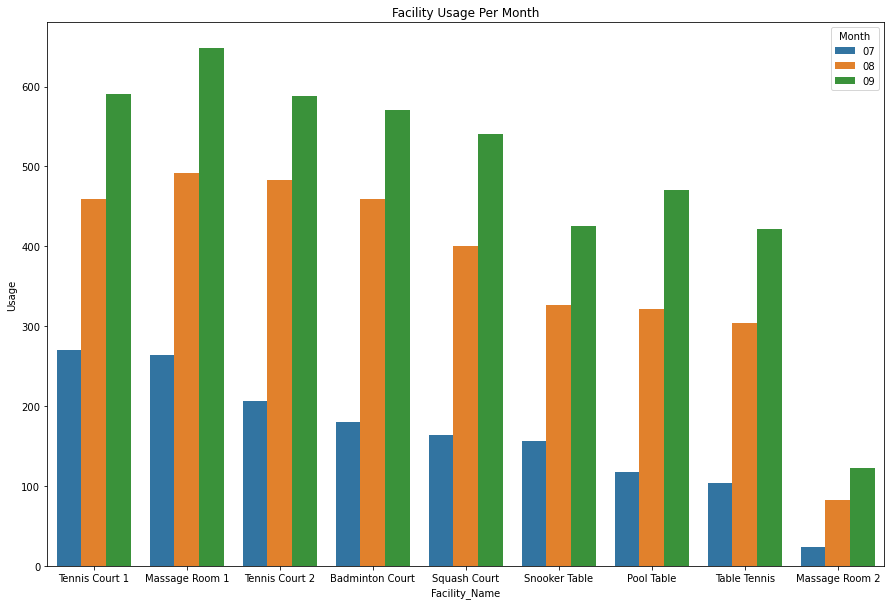

In [65]:
# Visualizing the Facility usage per Month:

a, b = plt.subplots(figsize = (15,10))
a = sns.barplot(x=usage_per_month['Facility_Name'], y=usage_per_month['Usage'], hue = usage_per_month['Month'], data=usage_per_month)
a.set_title('Facility Usage Per Month')
